In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")    
        

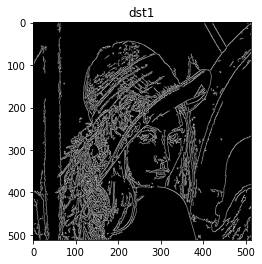

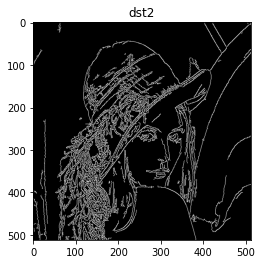

In [2]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.Canny(src, 50, 100) #threshold1=50, threshold2=100
#dst2 = cv2.Canny(src, 50, 300)
dst2 = cv2.Canny(src, 50, 150)

imshow('dst1', dst1); plt.show()
imshow('dst2', dst2); plt.show()


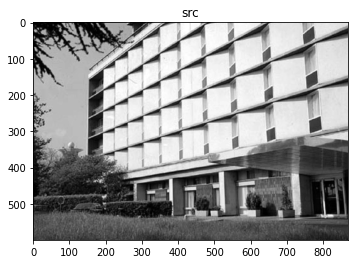

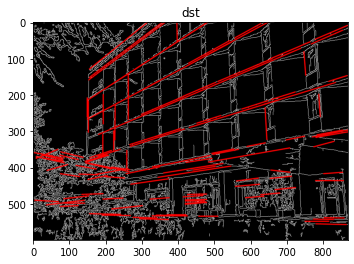

array([180, 309, 737,  72], dtype=int32)

In [6]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edge, 1, 3.141592 / 180, 160, minLineLength=50, maxLineGap=5)#edge,rho,theta,threshold
                                                        #line have to be over 50 pixel to be considered a line
                             #if gap is less than 5,we consider it as one line
        
        #lines return location of lines. starting coordintes and ending coordinates.
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src); plt.show()
imshow('dst', dst); plt.show()
lines[0][0]

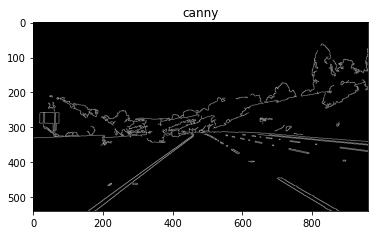

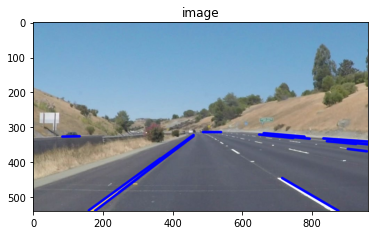

(14, 1, 4)

In [6]:
image = cv2.imread('lane.jpg')


canny = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 70, 200)

lines = cv2.HoughLinesP(canny, 1, 3.141592 / 180, 160, minLineLength=50, maxLineGap=5)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(image, pt1, pt2, (255, 0, 0), 5, cv2.LINE_AA)

imshow("canny", canny); plt.show()
imshow("image", image); plt.show()
lines.shape

<ipython-input-7-a6347a8965b8>:11: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)


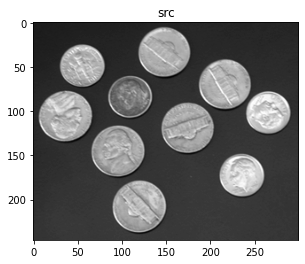

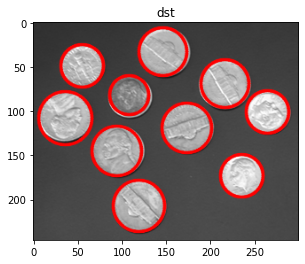

(1, 10, 3)

In [7]:
src = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

blurred = cv2.blur(src, (3, 3))
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 50,#minDist
                              param1=150, param2=30)#param1=Thigh,param2=Tlow

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(circles.shape[1]):  # 1,개수(nummber of circles),
     cx, cy, radius = circles[0][i]#center coordinates and radius
     cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src); plt.show()
imshow('dst', dst); plt.show()
circles.shape

In [15]:
print(circles.shape)
print(circles)
print(circles[0][0])

(1, 10, 3)
[[[173.5 119.5  28.8]
  [119.5 207.5  29.6]
  [216.5  69.5  27.9]
  [146.5  33.5  27.9]
  [108.5  82.5  22.4]
  [ 94.5 145.5  28.5]
  [264.5 101.5  24.1]
  [ 55.5  49.5  24.1]
  [235.5 173.5  24.6]
  [ 36.5 108.5  30.3]]]
[173.5 119.5  28.8]
